In [15]:
import numpy as np
import pandas as pd

In [16]:
import geopandas as gpd

In [17]:
from shapely.geometry import Point

In [9]:
# Load the CSV file
file_path = 'sample_data.csv'
df = pd.read_csv(file_path)

# Create a GeoDataFrame
geometry = [Point(xy) for xy in zip(df['lon'], df['lat'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry)

In [6]:
## Proximity Detection Using Spatial Index
## Use a spatial index for efficient proximity detection.

In [10]:
# Define the threshold distance (in kilometers)
threshold_distance = 0.5

# Convert threshold to radians
threshold_radians = threshold_distance / 6371  # Earth's radius in kilometers

# Build spatial index
spatial_index = gdf.sindex

# Function to find proximity events
def find_proximity_events(gdf, threshold_radians):
    proximity_events = []
    for idx, row in gdf.iterrows():
        point = row['geometry']
        possible_matches_index = list(spatial_index.intersection(point.buffer(threshold_radians).bounds))
        possible_matches = gdf.iloc[possible_matches_index]
        precise_matches = possible_matches[possible_matches.distance(point) < threshold_radians]
        for _, match in precise_matches.iterrows():
            if row['mmsi'] != match['mmsi']:
                proximity_events.append((row['mmsi'], match['mmsi'], row['timestamp']))
    return proximity_events

proximity_events = find_proximity_events(gdf, threshold_radians)

In [11]:
## Output Format
## Create a DataFrame with the proximity events and export it to a CSV file.

In [13]:
# Convert proximity events to a DataFrame
proximity_df = pd.DataFrame(proximity_events, columns=['mmsi', 'vessel_proximity', 'timestamp'])

# Export the proximity events DataFrame to a CSV file
output_file_path = 'proximity_events.csv'
proximity_df.to_csv(output_file_path, index=False)


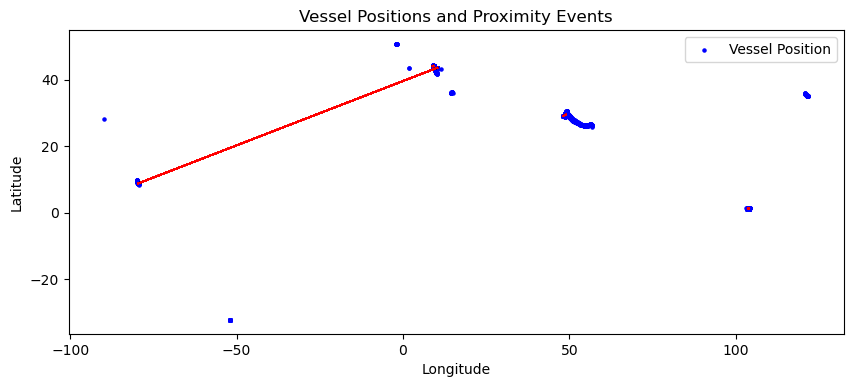

In [18]:
import matplotlib.pyplot as plt

# Plot vessel positions
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, color='blue', markersize=5, label='Vessel Position')

# Plot proximity events
for event in proximity_events:
    vessel1 = gdf[gdf['mmsi'] == event[0]].geometry.values[0]
    vessel2 = gdf[gdf['mmsi'] == event[1]].geometry.values[0]
    ax.plot([vessel1.x, vessel2.x], [vessel1.y, vessel2.y], color='red', linewidth=1)

plt.title('Vessel Positions and Proximity Events')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(loc='upper right')
plt.show()


In [20]:
proximity_df.head()    ## Output that are mentioned in assignment pdf

,mmsi,vessel_proximity,timestamp
0,538008084,538008064,2023-03-19 23:30:00+00
1,563014650,564780000,2023-03-14 01:30:00+00
2,538008084,538008064,2023-03-17 15:30:00+00
3,518998309,529123000,2023-03-21 18:30:00+00
4,538008084,538008064,2023-03-18 14:30:00+00
